In [4]:
import os, sys

# Point to root directory (one level above notebooks/)
ROOT_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(ROOT_DIR)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import PROCESSED_DATA

plt.style.use("seaborn-v0_8")

In [5]:
file_path = os.path.join(PROCESSED_DATA, "cleaned_reviews.csv")
df = pd.read_csv(file_path)
df.head()


,content,score,at,app,clean_content
0,it's special for me,5,2025-11-29 15:54:14,CBE,it s special for me
1,Make it user friendly.,2,2025-11-29 08:17:45,CBE,make it user friendly
2,maaliif daddafee install gaafata,3,2025-11-28 13:36:32,CBE,maaliif daddafee install gaafata
3,good app,5,2025-11-28 11:33:17,CBE,good app
4,This application is very important and advanta...,5,2025-11-27 23:08:20,CBE,this application is very important and advanta...


In [6]:
df.describe(include="all")


,content,score,at,app,clean_content
count,1139,1139.000000,1139,1139,1139
unique,915,NaN,1139,3,858
top,good,NaN,2025-11-29 15:54:14,CBE,good
freq,67,NaN,1,384,93
mean,NaN,3.806848,NaN,NaN,NaN
std,NaN,1.668352,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN
25%,NaN,2.000000,NaN,NaN,NaN
50%,NaN,5.000000,NaN,NaN,NaN
75%,NaN,5.000000,NaN,NaN,NaN


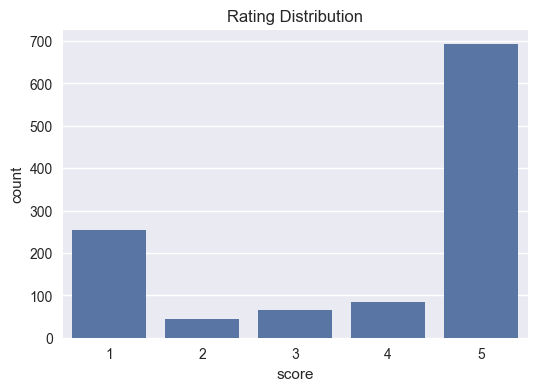

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="score")
plt.title("Rating Distribution")
plt.show()


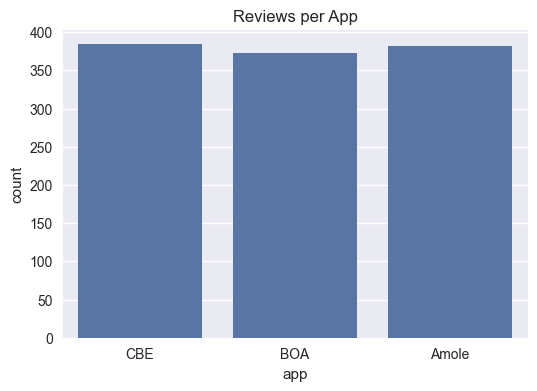

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="app")
plt.title("Reviews per App")
plt.show()


(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

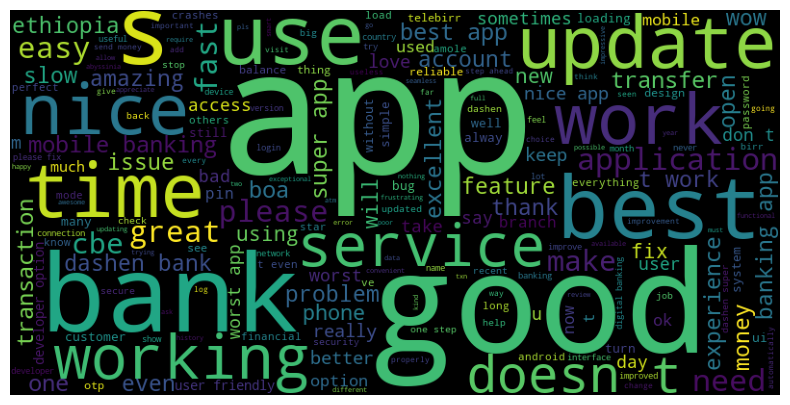

In [10]:
from wordcloud import WordCloud

text = " ".join(df["clean_content"].tolist())

wc = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")


In [11]:
df["label"] = df["score"].apply(lambda x: "positive" if x >= 4 else "negative")

df["label"].value_counts()


label
positive    777
negative    362
Name: count, dtype: int64